In [21]:
import networkx as nx

# Initialize the graph
seating_graph = nx.Graph()

# Add nodes for each person (representatives)
representatives = ['K', 'L', 'M', 'N', 'O', 'P']
seating_graph.add_nodes_from(representatives)

# Define relationships based on the problem statement

# 1. P sits immediately next to N
seating_graph.add_edge('P', 'N')

# 2. L sits immediately next to M, N, or both
seating_graph.add_edge('L', 'M')
seating_graph.add_edge('L', 'N')

# 3. K does not sit immediately next to M (no edge between K and M)
# No edge added here explicitly, but we will check this later during validation.

# 4. If O sits immediately next to P, O does not sit immediately next to M
# We'll leave this for later, when we decide where O and P sit in relation to M

# Display the current graph structure (just nodes and edges)
print("Nodes:", seating_graph.nodes())
print("Edges:", seating_graph.edges())

# Seating arrangement (clockwise direction from chair 1 to 6)
seating_arrangement = ['P', 'N', 'L', 'M', 'K', 'O']

# 3. K does not sit immediately next to M (validate this condition)
def validate_condition_3(seating_arrangement):
    for i in range(len(seating_arrangement)):
        if seating_arrangement[i] == 'K':
            # Check if K is seated next to M
            if seating_arrangement[(i+1) % len(seating_arrangement)] == 'M' or seating_arrangement[(i-1) % len(seating_arrangement)] == 'M':
                return False  # Condition violated
    return True

# 4. If O sits immediately next to P, O does not sit immediately next to M (validate this condition)
def validate_condition_4(seating_arrangement):
    # Find positions of O and P
    pos_O = seating_arrangement.index('O')
    pos_P = seating_arrangement.index('P')
    
    # Check if O sits next to P
    if (pos_O + 1) % len(seating_arrangement) == pos_P or (pos_P + 1) % len(seating_arrangement) == pos_O:
        # O sits next to P, check if O sits next to M
        if (pos_O + 1) % len(seating_arrangement) == seating_arrangement.index('M') or (pos_O - 1) % len(seating_arrangement) == seating_arrangement.index('M'):
            return False  # Condition violated
    return True

# Validate conditions
condition_3_valid = validate_condition_3(seating_arrangement)
condition_4_valid = validate_condition_4(seating_arrangement)

# Display the results of validation
print(f"Condition 3 (K does not sit next to M): {'Valid' if condition_3_valid else 'Invalid'}")
print(f"Condition 4 (If O sits next to P, O does not sit next to M): {'Valid' if condition_4_valid else 'Invalid'}")

Nodes: ['K', 'L', 'M', 'N', 'O', 'P']
Edges: [('L', 'M'), ('L', 'N'), ('N', 'P')]
Condition 3 (K does not sit next to M): Invalid
Condition 4 (If O sits next to P, O does not sit next to M): Valid


In [22]:
# Define the seating arrangement in terms of chair positions
seating_positions = {
    1: 'P',
    2: 'N',
    3: 'L',
    4: 'M',
    5: 'K',
    6: 'O'
}

# Function to find who sits between two people
def who_sits_between(seating_positions, person1, person2):
    # Find their positions
    pos1 = [key for key, value in seating_positions.items() if value == person1][0]
    pos2 = [key for key, value in seating_positions.items() if value == person2][0]
    
    # Find the position in between
    clockwise_pos1 = (pos1 % 6) + 1  # Clockwise direction
    clockwise_pos2 = (pos2 % 6) + 1  # Clockwise direction
    
    # Return the person sitting in between
    if abs(clockwise_pos1 - clockwise_pos2) == 2:  # Adjacent chairs are 1 and 2 apart
        between_pos = (clockwise_pos1 + 1) % 6
        if between_pos == 0:
            between_pos = 6
        return seating_positions[between_pos]
    return None

# Function to find who sits to the left of someone (counter-clockwise direction)
def who_sits_on_left(seating_positions, person):
    pos = [key for key, value in seating_positions.items() if value == person][0]
    left_pos = (pos - 1) % 6 + 1  # Counter-clockwise direction
    return seating_positions[left_pos]

# Function to find who sits to the right of someone (clockwise direction)
def who_sits_on_right(seating_positions, person):
    pos = [key for key, value in seating_positions.items() if value == person][0]
    right_pos = (pos + 1) % 6  # Clockwise direction
    if right_pos == 0:
        right_pos = 6
    return seating_positions[right_pos]

# Function to find the clockwise and anticlockwise order from a person
def seating_order(seating_positions, person, direction="clockwise"):
    pos = [key for key, value in seating_positions.items() if value == person][0]
    order = []
    
    if direction == "clockwise":
        for i in range(6):
            order.append(seating_positions[(pos + i - 1) % 6 + 1])  # Circular clockwise order
    elif direction == "anticlockwise":
        for i in range(6):
            order.append(seating_positions[(pos - i - 1) % 6 + 1])  # Circular anticlockwise order
    
    return order

In [23]:
# Example queries:
print(f"Who sits between P and M? {who_sits_between(seating_positions, 'P', 'M')}")
print(f"Who sits to the left of K? {who_sits_on_left(seating_positions, 'K')}")
print(f"Who sits to the right of O? {who_sits_on_right(seating_positions, 'O')}")
print(f"Clockwise order from L: {seating_order(seating_positions, 'L', 'clockwise')}")
print(f"Anticlockwise order from L: {seating_order(seating_positions, 'L', 'anticlockwise')}")


Who sits between P and M? None
Who sits to the left of K? K
Who sits to the right of O? P
Clockwise order from L: ['L', 'M', 'K', 'O', 'P', 'N']
Anticlockwise order from L: ['L', 'N', 'P', 'O', 'K', 'M']


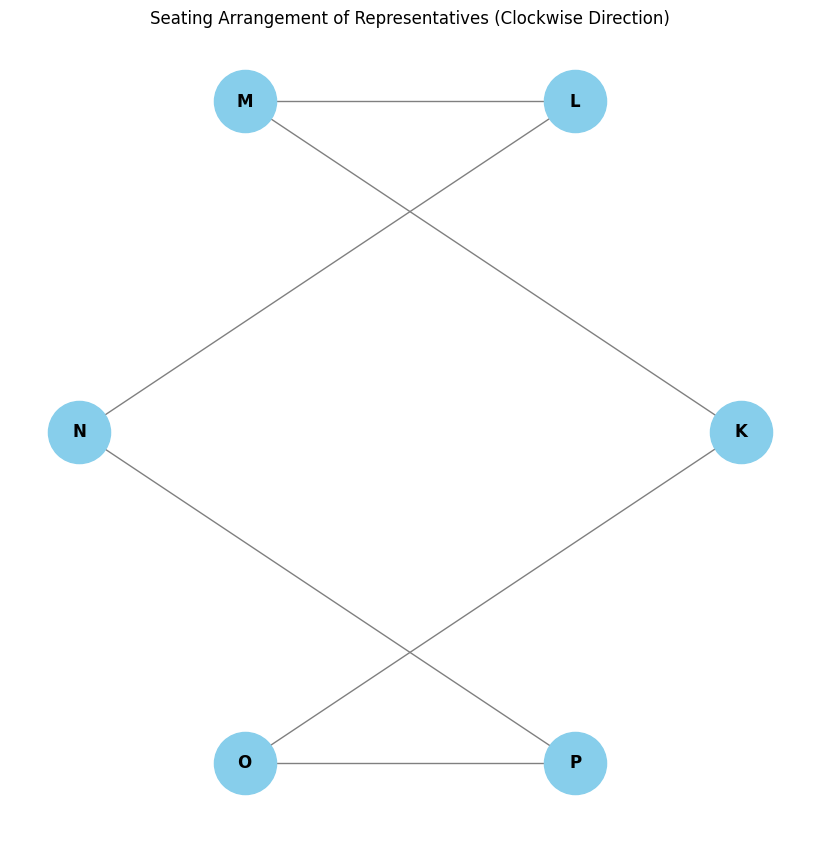

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the seating arrangement in terms of chair positions
seating_positions = {
    1: 'P',
    2: 'N',
    3: 'L',
    4: 'M',
    5: 'K',
    6: 'O'
}

# Initialize the graph
seating_graph = nx.Graph()

# Add nodes for each representative
representatives = ['K', 'L', 'M', 'N', 'O', 'P']
seating_graph.add_nodes_from(representatives)

# Add edges to represent adjacent seating
seating_graph.add_edge('P', 'N')
seating_graph.add_edge('N', 'L')
seating_graph.add_edge('L', 'M')
seating_graph.add_edge('M', 'K')
seating_graph.add_edge('K', 'O')
seating_graph.add_edge('O', 'P')  # Closing the circle by connecting O to P

# Create a circular layout
pos = nx.circular_layout(seating_graph)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(seating_graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

# Label the positions as numbers 1 to 6 (corresponding to the chair positions)
for i, (x, y) in pos.items():
    angle = (x, y)
    x_offset = 0.05
    y_offset = 0.05
    if i == 1:
        plt.text(x + x_offset, y + y_offset, '1', fontsize=12, fontweight='bold')
    elif i == 2:
        plt.text(x + x_offset, y + y_offset, '2', fontsize=12, fontweight='bold')
    elif i == 3:
        plt.text(x + x_offset, y + y_offset, '3', fontsize=12, fontweight='bold')
    elif i == 4:
        plt.text(x + x_offset, y + y_offset, '4', fontsize=12, fontweight='bold')
    elif i == 5:
        plt.text(x + x_offset, y + y_offset, '5', fontsize=12, fontweight='bold')
    elif i == 6:
        plt.text(x + x_offset, y + y_offset, '6', fontsize=12, fontweight='bold')

# Display the plot
plt.title('Seating Arrangement of Representatives (Clockwise Direction)')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


In [25]:
import itertools

# Define the list of representatives
representatives = ['K', 'L', 'M', 'N', 'O', 'P']

# Define the conditions for validation

# 1. P sits immediately next to N
def condition_1(arrangement):
    return abs(arrangement.index('P') - arrangement.index('N')) == 1 or \
           abs(arrangement.index('P') - arrangement.index('N')) == len(arrangement) - 1

# 2. L sits immediately next to M, N, or both
def condition_2(arrangement):
    return (abs(arrangement.index('L') - arrangement.index('M')) == 1 or
            abs(arrangement.index('L') - arrangement.index('N')) == 1)

# 3. K does not sit immediately next to M
def condition_3(arrangement):
    return abs(arrangement.index('K') - arrangement.index('M')) != 1

# 4. If O sits immediately next to P, O does not sit immediately next to M
def condition_4(arrangement):
    pos_O = arrangement.index('O')
    pos_P = arrangement.index('P')
    pos_M = arrangement.index('M')
    # Check if O and P are next to each other
    if abs(pos_O - pos_P) == 1 or abs(pos_O - pos_P) == len(arrangement) - 1:
        # If O and P are next to each other, O should not be next to M
        if abs(pos_O - pos_M) == 1 or abs(pos_O - pos_M) == len(arrangement) - 1:
            return False
    return True

# Helper function to normalize circular permutations
def normalize(arrangement):
    """Returns the lexicographically smallest rotation of the arrangement."""
    rotations = [arrangement[i:] + arrangement[:i] for i in range(len(arrangement))]
    return min(rotations)

# Generate all permutations of the seating arrangement
all_arrangements = itertools.permutations(representatives)

# Set to store unique valid arrangements (ignoring rotations)
unique_valid_arrangements = set()

# Iterate through all possible seating arrangements and check validity
for arrangement in all_arrangements:
    if (condition_1(arrangement) and condition_2(arrangement) and
        condition_3(arrangement) and condition_4(arrangement)):
        # Normalize and add to the set of unique valid arrangements
        normalized_arrangement = normalize(arrangement)
        unique_valid_arrangements.add(normalized_arrangement)

# Display unique valid seating arrangements
if unique_valid_arrangements:
    print("Valid seating arrangements found:")
    for valid in sorted(unique_valid_arrangements):
        print(valid)
else:
    print("No valid seating arrangements found.")


Valid seating arrangements found:
('K', 'L', 'M', 'N', 'P', 'O')
('K', 'L', 'M', 'O', 'N', 'P')
('K', 'L', 'M', 'P', 'N', 'O')
('K', 'L', 'N', 'P', 'M', 'O')
('K', 'M', 'L', 'N', 'P', 'O')
('K', 'M', 'L', 'O', 'N', 'P')
('K', 'M', 'L', 'O', 'P', 'N')
('K', 'M', 'L', 'P', 'N', 'O')
('K', 'M', 'O', 'L', 'N', 'P')
('K', 'M', 'P', 'N', 'L', 'O')
('K', 'N', 'P', 'L', 'M', 'O')
('K', 'N', 'P', 'M', 'L', 'O')
('K', 'N', 'P', 'O', 'L', 'M')
('K', 'O', 'L', 'M', 'N', 'P')
('K', 'O', 'L', 'M', 'P', 'N')
('K', 'O', 'L', 'N', 'P', 'M')
('K', 'O', 'M', 'L', 'N', 'P')
('K', 'O', 'M', 'L', 'P', 'N')
('K', 'O', 'M', 'P', 'N', 'L')
('K', 'O', 'N', 'P', 'L', 'M')
('K', 'O', 'N', 'P', 'M', 'L')
('K', 'O', 'P', 'N', 'L', 'M')
('K', 'O', 'P', 'N', 'M', 'L')
('K', 'P', 'N', 'L', 'M', 'O')
('K', 'P', 'N', 'L', 'O', 'M')
('K', 'P', 'N', 'M', 'L', 'O')
('K', 'P', 'N', 'O', 'L', 'M')
('K', 'P', 'N', 'O', 'M', 'L')


In [27]:
import itertools

# Define the list of representatives
representatives = ['K', 'L', 'M', 'N', 'O', 'P']

# Define the conditions for validation

# 1. P sits immediately next to N
def condition_1(arrangement):
    return abs(arrangement.index('P') - arrangement.index('N')) == 1 or \
           abs(arrangement.index('P') - arrangement.index('N')) == len(arrangement) - 1

# 2. L sits immediately next to M, N, or both
def condition_2(arrangement):
    return (abs(arrangement.index('L') - arrangement.index('M')) == 1 or
            abs(arrangement.index('L') - arrangement.index('N')) == 1)

# 3. K does not sit immediately next to M
def condition_3(arrangement):
    return abs(arrangement.index('K') - arrangement.index('M')) != 1

# 4. If O sits immediately next to P, O does not sit immediately next to M
def condition_4(arrangement):
    pos_O = arrangement.index('O')
    pos_P = arrangement.index('P')
    pos_M = arrangement.index('M')
    # Check if O and P are next to each other
    if abs(pos_O - pos_P) == 1 or abs(pos_O - pos_P) == len(arrangement) - 1:
        # If O and P are next to each other, O should not be next to M
        if abs(pos_O - pos_M) == 1 or abs(pos_O - pos_M) == len(arrangement) - 1:
            return False
    return True

# Helper function to normalize circular permutations
def normalize(arrangement):
    """Returns the lexicographically smallest rotation of the arrangement."""
    rotations = [arrangement[i:] + arrangement[:i] for i in range(len(arrangement))]
    return min(rotations)

# Generate all permutations of the seating arrangement
all_arrangements = itertools.permutations(representatives)

# Set to store unique valid arrangements (ignoring rotations)
unique_valid_arrangements = set()

# Iterate through all possible seating arrangements and check validity
for arrangement in all_arrangements:
    if (condition_1(arrangement) and condition_2(arrangement) and
        condition_3(arrangement) and condition_4(arrangement)):
        # Normalize and add to the set of unique valid arrangements
        normalized_arrangement = normalize(arrangement)
        unique_valid_arrangements.add(normalized_arrangement)

# Display unique valid seating arrangements
if unique_valid_arrangements:
    print("Valid seating arrangements found:")
    for valid in sorted(unique_valid_arrangements):
        print(valid)
else:
    print("No valid seating arrangements found.")


Valid seating arrangements found:
('K', 'L', 'M', 'N', 'P', 'O')
('K', 'L', 'M', 'O', 'N', 'P')
('K', 'L', 'M', 'P', 'N', 'O')
('K', 'L', 'N', 'P', 'M', 'O')
('K', 'M', 'L', 'N', 'P', 'O')
('K', 'M', 'L', 'O', 'N', 'P')
('K', 'M', 'L', 'O', 'P', 'N')
('K', 'M', 'L', 'P', 'N', 'O')
('K', 'M', 'O', 'L', 'N', 'P')
('K', 'M', 'P', 'N', 'L', 'O')
('K', 'N', 'P', 'L', 'M', 'O')
('K', 'N', 'P', 'M', 'L', 'O')
('K', 'N', 'P', 'O', 'L', 'M')
('K', 'O', 'L', 'M', 'N', 'P')
('K', 'O', 'L', 'M', 'P', 'N')
('K', 'O', 'L', 'N', 'P', 'M')
('K', 'O', 'M', 'L', 'N', 'P')
('K', 'O', 'M', 'L', 'P', 'N')
('K', 'O', 'M', 'P', 'N', 'L')
('K', 'O', 'N', 'P', 'L', 'M')
('K', 'O', 'N', 'P', 'M', 'L')
('K', 'O', 'P', 'N', 'L', 'M')
('K', 'O', 'P', 'N', 'M', 'L')
('K', 'P', 'N', 'L', 'M', 'O')
('K', 'P', 'N', 'L', 'O', 'M')
('K', 'P', 'N', 'M', 'L', 'O')
('K', 'P', 'N', 'O', 'L', 'M')
('K', 'P', 'N', 'O', 'M', 'L')
